# **Global Sensitivity Analysis**
We choose our parameters `A`, `beta1`, `beta2`, and `r_1`, and perform the Sobor sensitivity analysis. We collect the time that 80% of the population escape successfully.

In [1]:
from main_functions import one_simulation_without_gui
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import pandas as pd
import csv

# Define the problem
problem = {
    'num_vars': 4,
    'names': ['A', 'beta1', 'beta2', 'r_1'],
    'bounds': [ [1000, 2000], [0.5, 1.5], [2.5, 3.5], [0.6, 1]]
}

# Generate samples
distinct_samples = 16
param_values = saltelli.sample(problem, distinct_samples)

# Define the model function
def model(params):
    A, beta1, beta2, r_1 = params
    barrier_set = [(0, 0), (27, 17), (26, 8), (22, 6), (23, 11)]
    percent_threshold = 80
    r_2 = np.random.uniform(0, 1- r_1) 
    r_3 = 1 - r_1 - r_2
    seed = 41
    return one_simulation_without_gui(barrier_set, percent_threshold, r_1, r_2, r_3, A, A, -0.08, beta1, beta2, N=135, delta_time=0.005, seed=seed, gui_display=False)

# Number of replicates(fixed replicate equal to 1)
replicates = 1

# DataFrame to store results
results_list = []

for i in range(replicates):
    for param_set in param_values:
        time = model(param_set)
        results_list.append({
            'A': param_set[0],
            'beta1': param_set[1],
            'beta2': param_set[2],
            'r_1': param_set[3],
            'Time': time
        })

# Convert list of results to DataFrame
results_df = pd.DataFrame(results_list)

# Save to CSV
results_df.to_csv('global_SA_results.csv', index=False)


C:\Users\Weikang_Chen\AppData\Local\Temp\ipykernel_29644\3870922368.py:17: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, distinct_samples)


Time when 80% of people moved out: 22.87 seconds
Time when 80% of people moved out: 23.735 seconds
Time when 80% of people moved out: 21.345 seconds
Time when 80% of people moved out: 23.125 seconds
Time when 80% of people moved out: 20.08 seconds
Time when 80% of people moved out: 21.4 seconds
Time when 80% of people moved out: 21.3 seconds
Time when 80% of people moved out: 21.77 seconds
Time when 80% of people moved out: 22.065 seconds
Time when 80% of people moved out: 22.625 seconds
Time when 80% of people moved out: 101.985 seconds
Time when 80% of people moved out: 105.705 seconds
Time when 80% of people moved out: 53.19 seconds
Time when 80% of people moved out: 85.43 seconds
Time when 80% of people moved out: 27.89 seconds
Time when 80% of people moved out: 27.97 seconds
Time when 80% of people moved out: 25.49 seconds
Time when 80% of people moved out: 28.97 seconds
Time when 80% of people moved out: 62.66 seconds
Time when 80% of people moved out: 27.91 seconds
Time when 80%

In [2]:
si = sobol.analyze(problem, results_df['Time'].values, print_to_console=True)

             ST   ST_conf
A      0.079789  0.104303
beta1  0.225073  0.585776
beta2  0.024216  0.027286
r_1    0.945246  0.408759
             S1   S1_conf
A      0.002570  0.135274
beta1  0.006368  0.509906
beta2  0.022799  0.046173
r_1    0.260335  0.234967
                      S2   S2_conf
(A, beta1)     -0.026136  0.128172
(A, beta2)     -0.019536  0.095081
(A, r_1)        0.045063  0.336938
(beta1, beta2)  0.062561  0.562095
(beta1, r_1)    0.021986  0.525489
(beta2, r_1)   -0.033990  0.093102


c:\Users\Weikang_Chen\AppData\Local\Programs\Python\Python311\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


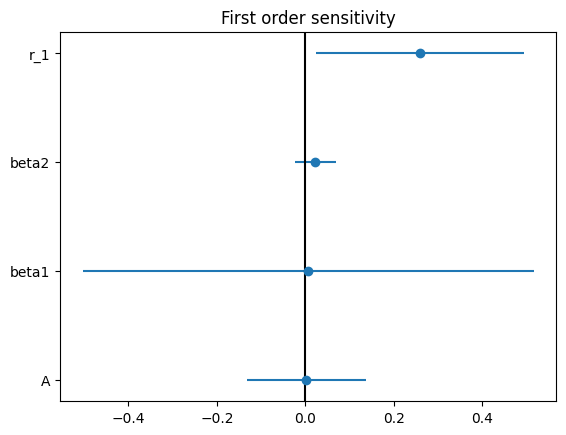

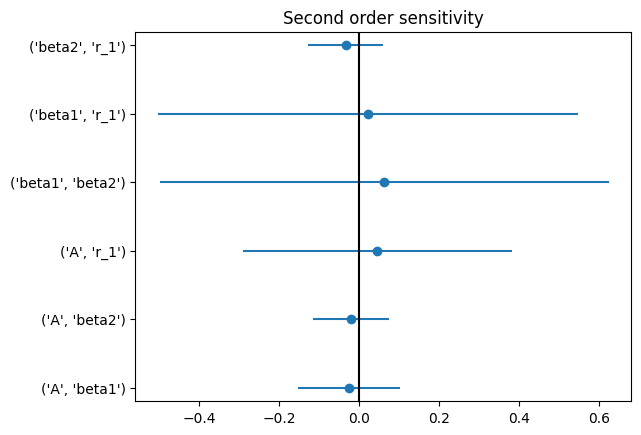

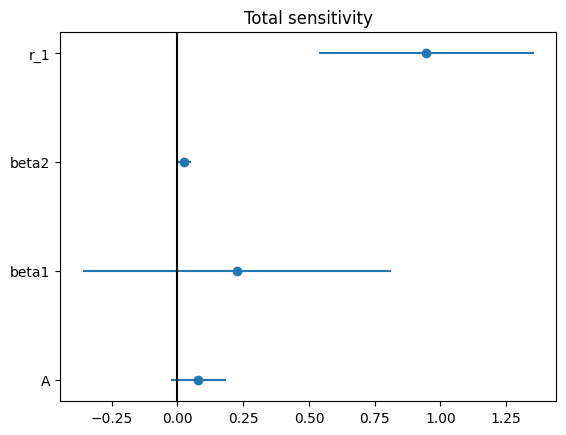

: 

In [5]:
plot_index(si, problem['names'], '1', 'First order sensitivity')
plt.show()
plot_index(si, problem['names'], '2', 'Second order sensitivity')
plt.show()
plot_index(si, problem['names'], 'T', 'Total sensitivity')
plt.show()